# **Lectura de archivos planos (Headers)**

In [1]:
import pandas as pd

In [3]:
pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/test.txt', sep =' ', header= None )

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,word
3,9,10,11,12,foo


In [4]:
pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/test.txt', sep =' ', names=['z','u','t','y', 'mensaje'])

,z,u,t,y,mensaje
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,word
3,9,10,11,12,foo


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/dates.txt', sep=',')
df.dtypes

date       object
product    object
price       int64
dtype: object

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/dates.txt', sep=',', parse_dates=['date'])
df.dtypes

date       datetime64[ns]
product            object
price               int64
dtype: object

In [8]:
df

,date,product,price
0,2019-01-01,A,10
1,2020-01-02,B,20
2,1998-01-03,C,30


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/dates_4.txt', sep=',', parse_dates=[['year','month','day']])
df

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2808\1934990709.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/dates_4.txt', sep=',', parse_dates=[['year','month','day']])


,year_month_day,product,price
0,2019-01-01,A,10
1,2019-01-02,B,20
2,2019-01-03,C,30
3,2019-01-04,D,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  4 non-null      datetime64[ns]
 1   product         4 non-null      object        
 2   price           4 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 228.0+ bytes


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/TXT/encuesta.txt', dtype=({"asistio": bool, "Tarea":bool} ))
df

,ID,asistio,Tarea
0,cef36,True,True
1,323e5,False,False
2,b29a1,True,False
3,04a11,True,True
4,dd0e7,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       5 non-null      object
 1   asistio  5 non-null      bool  
 2   Tarea    5 non-null      bool  
dtypes: bool(2), object(1)
memory usage: 182.0+ bytes


SQL

In [15]:
import sqlite3 as sql
conn= sql.connect('C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\SQL\\nba_salary.sqlite') #conexion a la base de datos
conn

In [17]:
# Visualizar las tablas
cursor = conn.cursor() #creacion de cursor para interactuar con la base de datos, ejecutar consultas SQL y recuperar resultados
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
#SELECT NAME: de la columna name (nombres de las tablas), 
#FROM sqlite_master --> especifico la tabla de la que quiero seleccionar los datos
#WHERE type='table --> indico que solo quiero las tablas de la base de datos excluyendo indices, vistas y triggers
print(cursor. fetchall()) #devuelve una lista en tuplas, donde cada tupla representa una fila del conjunto de resultados

[('NBA_season1718_salary',), ('Seasons_Stats',)]


In [18]:
df_salary = pd.read_sql_query("SELECT * from NBA_season1718_salary", conn)
df_salary.head()

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [19]:
df_stats = pd.read_sql_query("SELECT * from Seasons_Stats", conn)
df_stats.head()

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [20]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

In [22]:
df = pd.read_excel('C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\XLS\\defaultoutput.xlsx', sheet_name='Sheet1', usecols = "A,C,F")
df

,Unnamed: 0,ID,Marital_Status
0,0,5524,Single
1,1,2174,Single
2,2,4141,Together
3,3,6182,Together
4,4,5324,Married
...,...,...,...
2235,2235,10870,Married
2236,2236,4001,Together
2237,2237,7270,Divorced
2238,2238,8235,Together


In [23]:
df = pd.read_excel('C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\XLS\\defaultoutput.xlsx', sheet_name=0, usecols = "G:P")
df

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,58138.0,0,0,04-09-2012,58,635,88,546,172,88
1,46344.0,1,1,08-03-2014,38,11,1,6,2,1
2,71613.0,0,0,21-08-2013,26,426,49,127,111,21
3,26646.0,1,0,10-02-2014,26,11,4,20,10,3
4,58293.0,1,0,19-01-2014,94,173,43,118,46,27
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,13-06-2013,46,709,43,182,42,118
2236,64014.0,2,1,10-06-2014,56,406,0,30,0,0
2237,56981.0,0,0,25-01-2014,91,908,48,217,32,12
2238,69245.0,0,1,24-01-2014,8,428,30,214,80,30


In [24]:
df = pd.read_excel('C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\XLS\\defaultoutput.xlsx', sheet_name=0, usecols = "C:F,H,J:N")
df

,ID,Year_Birth,Education,Marital_Status,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts
0,5524,1957,Graduation,Single,0,04-09-2012,58,635,88,546
1,2174,1954,Graduation,Single,1,08-03-2014,38,11,1,6
2,4141,1965,Graduation,Together,0,21-08-2013,26,426,49,127
3,6182,1984,Graduation,Together,1,10-02-2014,26,11,4,20
4,5324,1981,PhD,Married,1,19-01-2014,94,173,43,118
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,0,13-06-2013,46,709,43,182
2236,4001,1946,PhD,Together,2,10-06-2014,56,406,0,30
2237,7270,1981,Graduation,Divorced,0,25-01-2014,91,908,48,217
2238,8235,1956,Master,Together,0,24-01-2014,8,428,30,214


In [25]:
xls = pd.ExcelFile('C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\XLS\\defaultoutput.xlsx')
xls.parse(sheet_name='Sheet1')

,Unnamed: 0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MostExpensive,Marital_Status_key,Education_key
0,0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,...,False,False,False,False,3,11,True,Wines,0,1
1,1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,...,False,False,False,False,3,11,False,Wines,0,1
2,2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,...,False,False,False,False,3,11,False,Wines,2,1
3,3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,...,False,False,False,False,3,11,False,MeatProducts,2,1
4,4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,...,False,False,False,False,3,11,False,Wines,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,...,False,False,False,False,3,11,False,Wines,1,1
2236,2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,...,False,True,False,False,3,11,False,Wines,2,0
2237,2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,...,False,False,False,False,3,11,False,Wines,3,1
2238,2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,...,False,False,False,False,3,11,False,Wines,2,2


#**SQL**

In [26]:
#pip install sqlite3
import sqlite3
import pandas as pd

In [28]:
# Ejemplo con Base David
path = 'C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\SQL\\david.sqlite'   #Direccion / Ruta

sql = sqlite3.connect(path)      #Connect para conexion a la BD

cursor = sql.cursor()            #Cursor es un objeto para manejar las consultas

In [29]:
#Explorar la BBDD
cursor.execute ("SELECT name from sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('users',), ('sqlite_sequence',), ('posts',), ('comments',), ('likes',)]


In [30]:
query = 'select * from posts'
cursor.execute(query)
print(cursor.fetchall())

[(1, 'Feliz', 'Me siento feliz hoy', 1), (2, 'Caliente', 'El clima esta caliente hoy', 2), (3, 'Ayuda', 'Necesito ayuda en esto', 2), (4, 'Buenas noticias', 'Me casare pronto', 1), (5, 'Juego interesante', 'Fue genial jugar al tenis', 5), (6, 'Fiesta', 'Alguno quiere venir a esta fiesta hoy?', 3), (7, 'Feliz', 'Me siento feliz hoy', 1), (8, 'Caliente', 'El clima esta caliente hoy', 2), (9, 'Ayuda', 'Necesito ayuda en esto', 2), (10, 'Buenas noticias', 'Me casare pronto', 1), (11, 'Juego interesante', 'Fue genial jugar al tenis', 5), (12, 'Fiesta', 'Alguno quiere venir a esta fiesta hoy?', 3)]


**Como Hacer Consulta con Pandas**

In [31]:
query1 = 'select * from users'
query2 = 'select * from posts'
query3 = 'select * from comments'
query4 = 'select * from likes'
query5 = 'select * from sqlite_sequence'

users = pd.read_sql_query(query1,sql) #le mando la consulta y la conexion
posts = pd.read_sql_query(query2,sql)
comments = pd.read_sql_query(query3,sql)
likes = pd.read_sql_query(query4,sql)
sqlite = pd.read_sql_query(query5,sql)

In [32]:
comments

,id,text,user_id,post_id
0,1,Cuenta conmigo,1,6
1,2,Que tipo de ayuda?,5,3
2,3,Felicitaciones,2,4
3,4,Estuve jugando con Rafael,4,5
4,5,Te ayudo con tu tesis?,2,3
5,6,Muchas felicitaciones,5,4
6,7,Cuenta conmigo,1,6
7,8,Que tipo de ayuda?,5,3
8,9,Felicitaciones,2,4
9,10,Estuve jugando con Rafael,4,5


In [33]:
#Script completo de Query largas

sql = sqlite3.connect(path)
cursor = sql.cursor()

query = '''
select *
from users
'''

users = pd.read_sql_query(query,sql)
cursor.close()
sql.close()

**Libreria cx_Oracle**

In [34]:
#python -m pip install cx_Oracle --upgrade --user

#import cx_Oracle

# Connect as user "hr" with password "welcome" to the "orclpdb1" service running on this computer.
#connection = cx_Oracle.connect(user="hr", password="welcome",
                               #dsn="localhost/orclpdb1")

#cursor = connection.cursor()
#cursor.execute("""
#        SELECT first_name, last_name
#        FROM employees
#        WHERE department_id = :did AND employee_id > :eid""",
#        did = 50,
#        eid = 190)

#for fname, lname in cursor:
#    print("Values:", fname, lname)

In [35]:
#Instalacion alchemy
!pip install --upgrade --no-deps git+https://github.com/psychemedia/eralchemy.git

  Cloning https://github.com/psychemedia/eralchemy.git to c:\users\victus\appdata\local\temp\pip-req-build-ae2hyio5
  Resolved https://github.com/psychemedia/eralchemy.git to commit 7b90be5e46e997006eff9ff8a287c7fa8cf9687c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ERAlchemy: filename=ERAlchemy-1.2.9-py2.py3-none-any.whl size=16134 sha256=a7823a35c8ee6c87a0ce66919f1fedf709801566758fe3427894bffcd97fcd8b
  Stored in directory: C:\Users\VICTUS\AppData\Local\Temp\pip-ephem-wheel-cache-a_4lcfuc\wheels\b2\3f\65\740b733ec6371a88855bf43b85eee157a6f9375d534ffb7d00
Successfully built ERAlch

  Running command git clone --filter=blob:none --quiet https://github.com/psychemedia/eralchemy.git 'C:\Users\VICTUS\AppData\Local\Temp\pip-req-build-ae2hyio5'


# **JSON**

In [36]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [44]:
json = pd.read_json('https://raw.githubusercontent.com/valemicolgarcia/Machine-Learning-for-Data-Science/main/Datos/JSON/nested_json.json')
json

data= json

## APIs

In [51]:
!pip install pytrends

In [52]:
pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to c:\users\victus\appdata\local\temp\pip-req-build-tleipc6c
  Resolved https://github.com/GeneralMills/pytrends to commit a9984ffdc9b31d853dde2ab614a77ecbf2bf33a1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/GeneralMills/pytrends 'C:\Users\VICTUS\AppData\Local\Temp\pip-req-build-tleipc6c'


BIBLIOTECA PYTRENDS

In [26]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ["profundidad", "juego", "limites"]
pytrends.build_payload(keywords, cat=0, timeframe='today 5-y', geo='', gprop='') # Datos de los ultimos 5 años
stop_queries = pytrends.interest_over_time()[keywords] #obtengo datos de interes y los guardo en stop_queries
stop_queries.tail()


C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,profundidad,juego,limites
date,,,
2024-04-28,1,42,4
2024-05-05,1,41,4
2024-05-12,1,40,4
2024-05-19,1,44,4
2024-05-26,1,50,4


In [27]:
stop_queries.describe()

,profundidad,juego,limites
count,262.000000,262.000000,262.000000
mean,1.015267,41.816794,3.828244
std,0.410303,6.841166,0.781175
min,0.000000,31.000000,2.000000
25%,1.000000,38.000000,3.000000
50%,1.000000,41.000000,4.000000
75%,1.000000,44.000000,4.000000
max,7.000000,100.000000,6.000000


In [28]:
stop_queries.shape

(262, 3)

In [29]:
pytrends.build_payload?

Signature:
pytrends.build_payload(
    kw_list,
    cat=0,
    timeframe='today 5-y',
    geo='',
    gprop='',
)
Docstring: Create the payload for related queries, interest over time and interest by region
File:      c:\users\victus\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\pytrends\request.py
Type:      method

## yfinance --> Yahoo Finance


In [15]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.4/3.0 MB 4.6 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 6.1 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 7.5 MB/s eta 0:00:01
     ----------------------- ---------------- 1.7/3.0 MB 8.3 MB/s eta 0:00:01
     --------------------------------- ------ 2.4/3.0 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 11.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): f

In [30]:
import yfinance as yf
pfe = yf.Ticker('PFE')
pfe.info

{'address1': '66 Hudson Boulevard East',
 'city': 'New York',
 'state': 'NY',
 'zip': '10001-2192',
 'country': 'United States',
 'phone': '212 733 2323',
 'website': 'https://www.pfizer.com',
 'industry': 'Drug Manufacturers - General',
 'industryKey': 'drug-manufacturers-general',
 'industryDisp': 'Drug Manufacturers - General',
 'sector': 'Healthcare',
 'sectorKey': 'healthcare',
 'sectorDisp': 'Healthcare',
 'longBusinessSummary': "Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products in the United States, Europe, and internationally. The company offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic, migraine, and women's health under the Eliquis, Nurtec ODT/Vydura, Zavzpret, and the Premarin family brands; infectious diseases with unmet medical needs under the Prevnar family, Abrysvo, Nimenrix, FSME/IMMUN-TicoVac, and Trumenba brands; and COVID-19 prevention and treatment, and potential fu

In [31]:
# Scar los dividendos
pfe.actions

,Dividends,Stock Splits
Date,,
1972-08-29 00:00:00-04:00,0.003163,0.0
1972-11-28 00:00:00-05:00,0.004151,0.0
1973-02-28 00:00:00-05:00,0.003163,0.0
1973-05-30 00:00:00-04:00,0.003163,0.0
1973-08-28 00:00:00-04:00,0.003163,0.0
...,...,...
2023-05-11 00:00:00-04:00,0.410000,0.0
2023-07-27 00:00:00-04:00,0.410000,0.0
2023-11-09 00:00:00-05:00,0.410000,0.0


In [32]:
pfe.history

<bound method TickerBase.history of yfinance.Ticker object <PFE>>

In [33]:
# period: Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Tambien se puede colocar start, end
hist = pfe.history(period="6mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-27 00:00:00-05:00,29.844051,29.844051,29.145264,29.252022,26066700,0.0,0.0
2023-11-28 00:00:00-05:00,29.222907,29.222907,28.766753,28.815281,29497700,0.0,0.0
2023-11-29 00:00:00-05:00,28.892922,29.329663,28.854100,29.193789,26185200,0.0,0.0
2023-11-30 00:00:00-05:00,29.417014,29.611122,29.077325,29.572300,45356600,0.0,0.0
2023-12-01 00:00:00-05:00,28.116492,28.533823,27.466231,28.058260,103542800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,28.660000,28.709999,28.459999,28.530001,22423300,0.0,0.0
2024-05-21 00:00:00-04:00,28.469999,28.670000,28.320000,28.559999,28119900,0.0,0.0
2024-05-22 00:00:00-04:00,28.469999,29.629999,28.420000,29.600000,46987500,0.0,0.0


## Lectura en serie de datos

In [38]:
pip install matplotlib

     ---------------------------------------- 0.0/164.2 kB ? eta -:--:--
     ---------------------------- --------- 122.9/164.2 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 164.2/164.2 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 39.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.2/8.0 MB 33.6 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/8.0 MB 38.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 38.1 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.0 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 33.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/188.2 kB ? eta -:--:--
   --------------------------------------- 188.2/188.2 kB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------

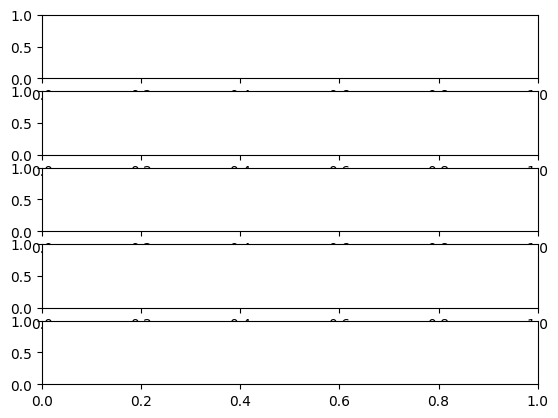

In [41]:
tickers = ['TSLA', 'API', 'LMND','MRK','GOOG']
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(tickers),1,i+1)
  #current_ticker.history(period='1d')['Close'].plot(figsize=   (16,60), title='Precio historico de 1 de un año para: '+ticker)

In [42]:
# Informacion del primero
ticker = tickers[0]
yf_info = yf.Ticker(ticker).info
print(ticker)

TSLA


In [43]:
# Creciemito de 52 semanas
yf_info['52WeekChange']

-0.10896796

In [44]:
# Sacando algunas estadisticas de interes
stock_52w_change = []
profitsMargins = []
tickers = ['NVS','JNJ','ABBV','AMGN']
for ticker in tickers:
  print(ticker)
  current_ticker = yf.Ticker(ticker)
  current_ticker_info = current_ticker.info
  stock_52w_change.append(current_ticker_info['52WeekChange'])
  profitsMargins.append(current_ticker_info['profitMargins'])

NVS
JNJ
ABBV
AMGN


In [45]:
stock_52w_change

[0.041222215, -0.047936797, 0.15112865, 0.39953327]

In [46]:
profitsMargins

[0.31938, 0.44923002, 0.11016, 0.12742]

## Marca mas robada

In [48]:
df2['automotor_marca_descripcion'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas mas robadas')

NameError: name 'df2' is not defined

In [ ]:
df2['automotor_modelo_descripcion'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos mas robadas')

In [ ]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por genero')

In [ ]:
df2['titular_pais_nacimiento'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

In [ ]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

## drive

In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df2 = pd.read_csv('dnrpa-robos-recuperos-autos-202201.csv',sep=",")
df2.head(10)

In [ ]:
df2.shape
print('El df tiene {} instancias y {} features'.format(df2.shape[0],df2.shape[1]))

In [ ]:
df2.dtypes

In [ ]:
df2.describe()

In [ ]:
df2['tramite_fecha']=pd.to_datetime(df2['tramite_fecha']) # Formato datetime python
monthly_accidents =df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()
monthly_accidents.plot.line(figsize=(12,6))

## local

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dnrpa-robos-recuperos-autos-202201.csv']),sep=",")
df2.head(10)

In [ ]:
type(uploaded)